In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Combination(n, r):
    return math.factorial(n)//math.factorial(n-r)//math.factorial(r)

def Binomial(param):
    N=param[0]
    p=param[1]
    return [Combination(N, k)*pow(p, k)*pow(1-p, N-k) for k in range(N+1)]

def Sum_Binomial(na, pa, nb, pb):
    A=Binomial([na, pa])
    B=Binomial([nb, pb])
    l=np.max([na, nb])
    
    #probability map
    prob_map=np.zeros((l+1, l+1))
    prob_map[:na+1, :nb+1]=np.dot(np.array(A).reshape(-1, 1), np.array(B).reshape(1, -1))
    
    #upper-left part of matrix
    hist_former=[np.sum([prob_map[i, s-i] for i in range(s+1)]) for s in range(l+1)]
    
    #lower-right part of matrix
    hist_latter=[np.sum([prob_map[-1-i, l-(minus-i)] for i in range(minus+1)]) for minus in range(l)]
    
    hist=hist_former+hist_latter[::-1]
    return hist

mathmatical method: E(A+B)=E(A)+E(B)=13.6
mathmatical method: V(A+B)=V(A)+V(B)=3.28
computational method: E(A+B)=13.600000000000001
computational method: V(A+B)=3.2799999999999727


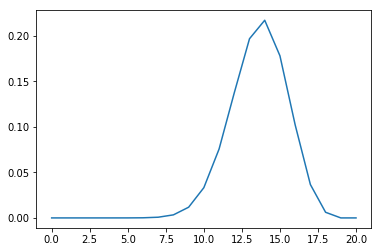

In [3]:
#set parameters
na, pa=10, 0.8
nb, pb=8, 0.7

#get Binomial distribution
A=Binomial([na, pa])
B=Binomial([nb, pb])

#get E(A+B) and V(A+B) by mathmatical method
print('mathmatical method: E(A+B)=E(A)+E(B)='+str(na*pa+nb*pb))
print('mathmatical method: V(A+B)=V(A)+V(B)='+str(na*pa*(1-pa)+nb*pb*(1-pb)))

#get A+B distribution
add_dist=Sum_Binomial(na, pa, nb, pb)

#get E(A+B)
mu=np.dot(np.arange(len(add_dist)), add_dist)
print('computational method: E(A+B)='+str(mu))

#get V(A+B)
rho=np.dot(np.arange(len(add_dist))**2, add_dist)-mu**2
print('computational method: V(A+B)='+str(rho))

#plot
plt.plot(np.arange(len(add_dist)), add_dist)
plt.show()

In [4]:
def Binomials(list_n_p):
    #list_n_p: 2-dimensioin vector (shape=(n, 2))
    #list_n_p[i]: i-th setting for Binomial distribution.
    #list_n_p[i, 0]: n of i-th Binomial dist.
    #list_n_p[i, 1]: p of i-th Binomial dist.
    
    print(list_n_p[0])
    
    hist=Binomial(list_n_p[0])
    for i in range(len(list_n_p)-1):
        pre_prob=hist
        add_prob=Binomial(list_n_p[i+1])

        l=np.max([len(pre_prob), len(add_prob)])
        mx=len(pre_prob)+len(add_prob)-2

        #probability map
        prob_map=np.zeros((l, l))
        prob_map[:len(pre_prob), :len(add_prob)]=np.dot(np.array(pre_prob).reshape(-1, 1), np.array(add_prob).reshape(1, -1))

        #upper-left part of matrix
        hist_former=[np.sum([prob_map[i, s-i] for i in range(s+1)]) for s in range(l)]

        #lower-right part of matrix
        hist_latter=[np.sum([prob_map[-1-i, l-(minus-i)-1] for i in range(minus+1)]) for minus in range(l-1)]

        hist=hist_former+hist_latter[::-1]
        hist=hist[:mx+1]
        
    return hist

mathmatical method: E(A+B+C)=E(A)+E(B)+E(C)=16.6
mathmatical method: V(A+B+C)=V(A)+V(B)+V(C)=4.779999999999999
[10, 0.8]
computational method: E(A+B+C)=16.6
computational method: V(A+B+C)=4.779999999999916


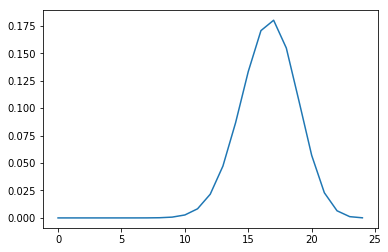

In [5]:
#set parameters
na, pa=10, 0.8
nb, pb=8, 0.7
nc, pc=6, 0.5

paramlist=[
    [na, pa],
    [nb, pb],
    [nc, pc]
]

#get Binomial distribution
A=Binomial([na, pa])
B=Binomial([nb, pb])
C=Binomial([nc, pc])

#get E(A+B+C) and V(A+B+C) by mathmatical method
print('mathmatical method: E(A+B+C)=E(A)+E(B)+E(C)='+str(na*pa+nb*pb+nc*pc))
print('mathmatical method: V(A+B+C)=V(A)+V(B)+V(C)='+str(na*pa*(1-pa)+nb*pb*(1-pb)+nc*pc*(1-pc)))

#get A+B+C distribution
add_dist=Binomials(paramlist)

#get E(A+B+C)
mu=np.dot(np.arange(len(add_dist)), add_dist)
print('computational method: E(A+B+C)='+str(mu))

#get V(A+B+C)
rho=np.dot(np.arange(len(add_dist))**2, add_dist)-mu**2
print('computational method: V(A+B+C)='+str(rho))

#plot
plt.plot(np.arange(len(add_dist)), add_dist)
plt.show()